In [ ]:
!pip3 install torch

In [ ]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

Text(0.5, 0, 'x')

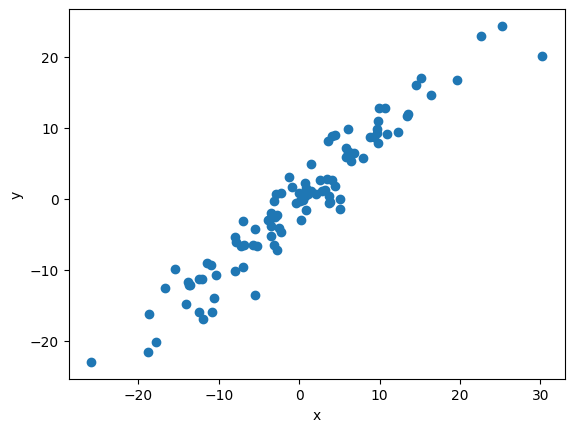

In [ ]:
X = torch.randn(100, 1)*10
y = X + 3*(torch.randn(100, 1))
plt.plot(X.numpy(), y.numpy(), 'o')
plt.ylabel('y')
plt.xlabel('x')

In [ ]:
class LR(nn.Module):
  def __init__(self, input_size, output_size):
    super().__init__()
    self.linear = nn.Linear(input_size, output_size)
  def forward(self, x):
    pred = self.linear(x)
    return pred

In [ ]:
torch.manual_seed(1)
model = LR(1, 1)
print(model)

LR(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)


In [ ]:
[w, b] = model.parameters()
def get_params():
  return (w[0][0].item(), b[0].item())

In [ ]:
def plot_fit(title):
  plt.title = title
  w1, b1 = get_params()
  x1 = np.array([-30, 30])
  y1 = w1*x1 + b1
  plt.plot(x1, y1, 'r')
  plt.scatter(X, y)
  plt.show()

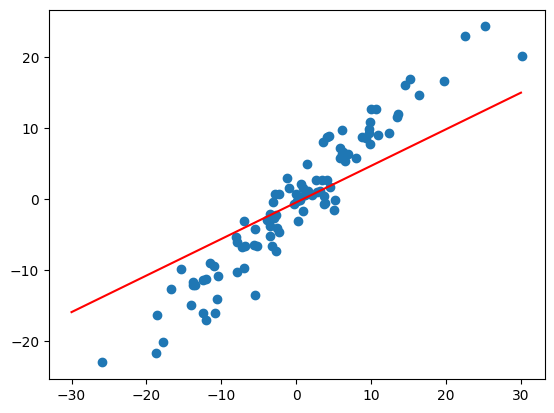

In [ ]:
plot_fit('Initial Model')

In [ ]:
x = torch.tensor([[1.0], [2.0]])
print(model.forward(x))

tensor([[0.0739],
        [0.5891]], grad_fn=<AddmmBackward0>)


In [ ]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

In [ ]:
epochs = 100
losses = []
for i in range(epochs):
  y_pred = model.forward(X)
  loss = criterion(y_pred, y)
  print("epoch", i, "loss", loss.item())

  losses.append(loss)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

epoch 0 loss 25.323808670043945
epoch 1 loss 24.611278533935547
epoch 2 loss 23.927160263061523
epoch 3 loss 23.27033042907715
epoch 4 loss 22.63968276977539
epoch 5 loss 22.034164428710938
epoch 6 loss 21.45281410217285
epoch 7 loss 20.894630432128906
epoch 8 loss 20.35869598388672
epoch 9 loss 19.844131469726562
epoch 10 loss 19.35008430480957
epoch 11 loss 18.8757381439209
epoch 12 loss 18.4202880859375
epoch 13 loss 17.98301124572754
epoch 14 loss 17.56317710876465
epoch 15 loss 17.160066604614258
epoch 16 loss 16.773029327392578
epoch 17 loss 16.401424407958984
epoch 18 loss 16.044633865356445
epoch 19 loss 15.702075004577637
epoch 20 loss 15.373165130615234
epoch 21 loss 15.057373046875
epoch 22 loss 14.754172325134277
epoch 23 loss 14.463061332702637
epoch 24 loss 14.183553695678711
epoch 25 loss 13.915194511413574
epoch 26 loss 13.657526969909668
epoch 27 loss 13.410137176513672
epoch 28 loss 13.172607421875
epoch 29 loss 12.944552421569824
epoch 30 loss 12.725593566894531
epoc

Text(0.5, 0, 'epoch')

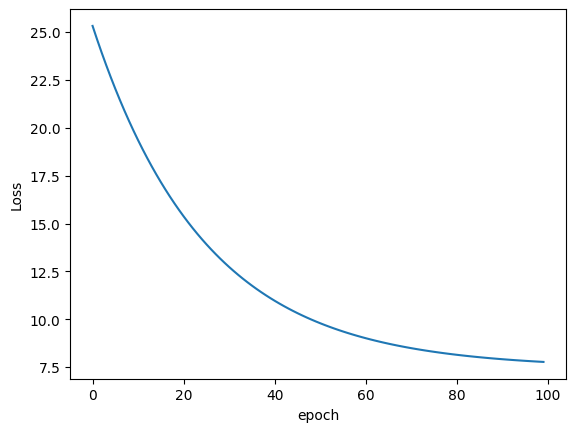

In [ ]:
plt.plot(range(epochs), [l.detach() for l in losses])
plt.ylabel('Loss')
plt.xlabel('epoch')

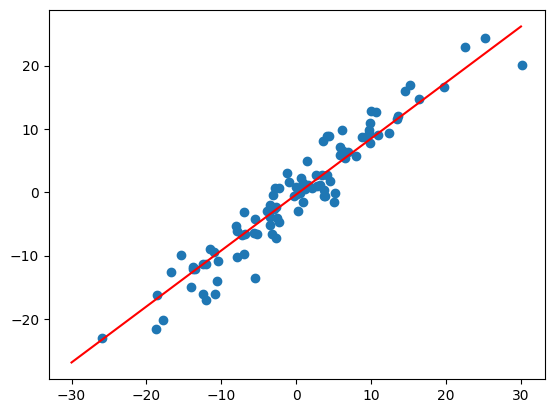

In [ ]:
plot_fit("Trained Model")